<h1>Getting datasets from google drive to workspace </h1>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
!cp -r "/content/gdrive/MyDrive/final_antispoofing.zip" "/content"

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
import zipfile
archive = zipfile.ZipFile('/content/final_antispoofing.zip')
archive.extractall('/content')

FileNotFoundError: [Errno 2] No such file or directory: '/content/final_antispoofing.zip'

<h1>Data Preprocessing </h1>

<h2> Four Steps </h2>
<h3>Step 1: Create new directory structure for the datasets</h3>
<h3>Step 2: Copying images into new directory structure </h3>
<h3>Step 3: Dataset Exploration </h3>
<h4> Step 4: Dataset Visualization </h3>

<h3>Step 1 </h1>

<h2>Original VS New Directory Structure</h2>

In [14]:
from IPython import display
print("Original Vs New Dataset Structure")
display.Image('original vs new_dataset.png')

Original Vs New Dataset Structure


FileNotFoundError: No such file or directory: 'original vs new_dataset.png'

FileNotFoundError: No such file or directory: 'original vs new_dataset.png'

<IPython.core.display.Image object>

In [22]:
dataset_dir = r'final_antispoofing'
train_dataset_dir = r'final_antispoofing/train'
test_dataset_dir = r'final_antispoofing/test'

In [23]:
import os
os.mkdir(r'final_antispoofing_dataset')
os.mkdir(r'final_antispoofing_dataset\train')
os.mkdir(r'final_antispoofing_dataset\test')
os.mkdir(r'final_antispoofing_dataset\train\real')
os.mkdir(r'final_antispoofing_dataset\train\spoof')
os.mkdir(r'final_antispoofing_dataset\test\real')
os.mkdir(r'final_antispoofing_dataset\test\spoof')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'final_antispoofing_dataset'

In [24]:
train_dir=r'final_antispoofing_dataset\train'
test_dir = r'final_antispoofing_dataset\test'

<h3>Step 2 </h3>

In [25]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [26]:
def train_test_splits(data_directory):
  for split_type in os.listdir(data_directory):
    path_to_split_type = os.path.join(data_directory,split_type)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type,category)
      for subject in os.listdir(path_to_category):
        path_to_subject = os.path.join(path_to_category,subject)
        for img in os.listdir(path_to_subject):
          if split_type == 'train':
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(train_dir,category,img))
          else:
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(test_dir,category,img))

In [27]:
train_test_splits(data_directory=dataset_dir)


<h3>Step 3 </h3>

<h3>Dataset Exploration </h3>

In [28]:
categories = ['real','spoof']

In [29]:
print("---------------------Exploring Training Datasets--------------------")
for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))

print("-----------------------Exploring Testing Datasets-------------------------")
for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

---------------------Exploring Training Datasets--------------------
There are 2102 images in real directory
There are 2118 images in spoof directory
There are 4220 total images in training directory
-----------------------Exploring Testing Datasets-------------------------
There are 477 images in real directory
There are 474 images in spoof directory
There are 951 total images in testing directory


<h3>Step 4 : Dataset Visualization </h3>

In [30]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [32]:
def visualize_dataset(image_path,rows,cols):
  total_images = len(image_path)
  print(f"Total images available: {total_images}")
  
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    if i-1 < total_images:
      fig.add_subplot(rows,cols,i)
      img_array = cv2.imread(image_path[i-1])
      fig.subplots_adjust(hspace=1)
      plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
      try:
        label = os.path.basename(os.path.dirname(image_path[i-1]))
        plt.xlabel(label)
      except IndexError as e:
        print(f"Index {i-1} caused the error: {e}")  
    else:
      print(f"Index {i-1} is out of range") 
      break 
  plt.show()


In [33]:
training_image_path = get_images(data_dir= train_dir,number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['final_antispoofing_dataset\\train\\real\\20201110_113249.jpg', 'final_antispoofing_dataset\\train\\real\\20201110_113251.jpg', 'final_antispoofing_dataset\\train\\real\\20201110_113253.jpg', 'final_antispoofing_dataset\\train\\real\\20201110_113254.jpg', 'final_antispoofing_dataset\\train\\real\\20201110_113259hr_flip.jpg', 'final_antispoofing_dataset\\train\\real\\20201110_113317hr_flip.jpg', 'final_antispoofing_dataset\\train\\real\\20201110_113324hr_flip.jpg', 'final_antispoofing_dataset\\train\\real\\20201110_113327hr_flip.jpg', 'final_antispoofing_dataset\\train\\real\\20201110_113330hr_flip.jpg', 'final_antispoofing_dataset\\train\\real\\20201110_113334.jpg', 'final_antispoofing_dataset\\train\\real\\20201110_113337.jpg', 'final_antispoofing_dataset\\train\\real\\20201110_113350.jpg', 'final_antispoofing_dataset\\train\\real\\20201110_113353.jpg', 'final_antispoofing_dataset\\train\\real\\20201110_113404.jpg', 'final_antispoofing_dataset\\train\\real\\20201110_113404hr_flip.jpg

<h3>Training Dataset Visualization</h3>

Total images available: 50


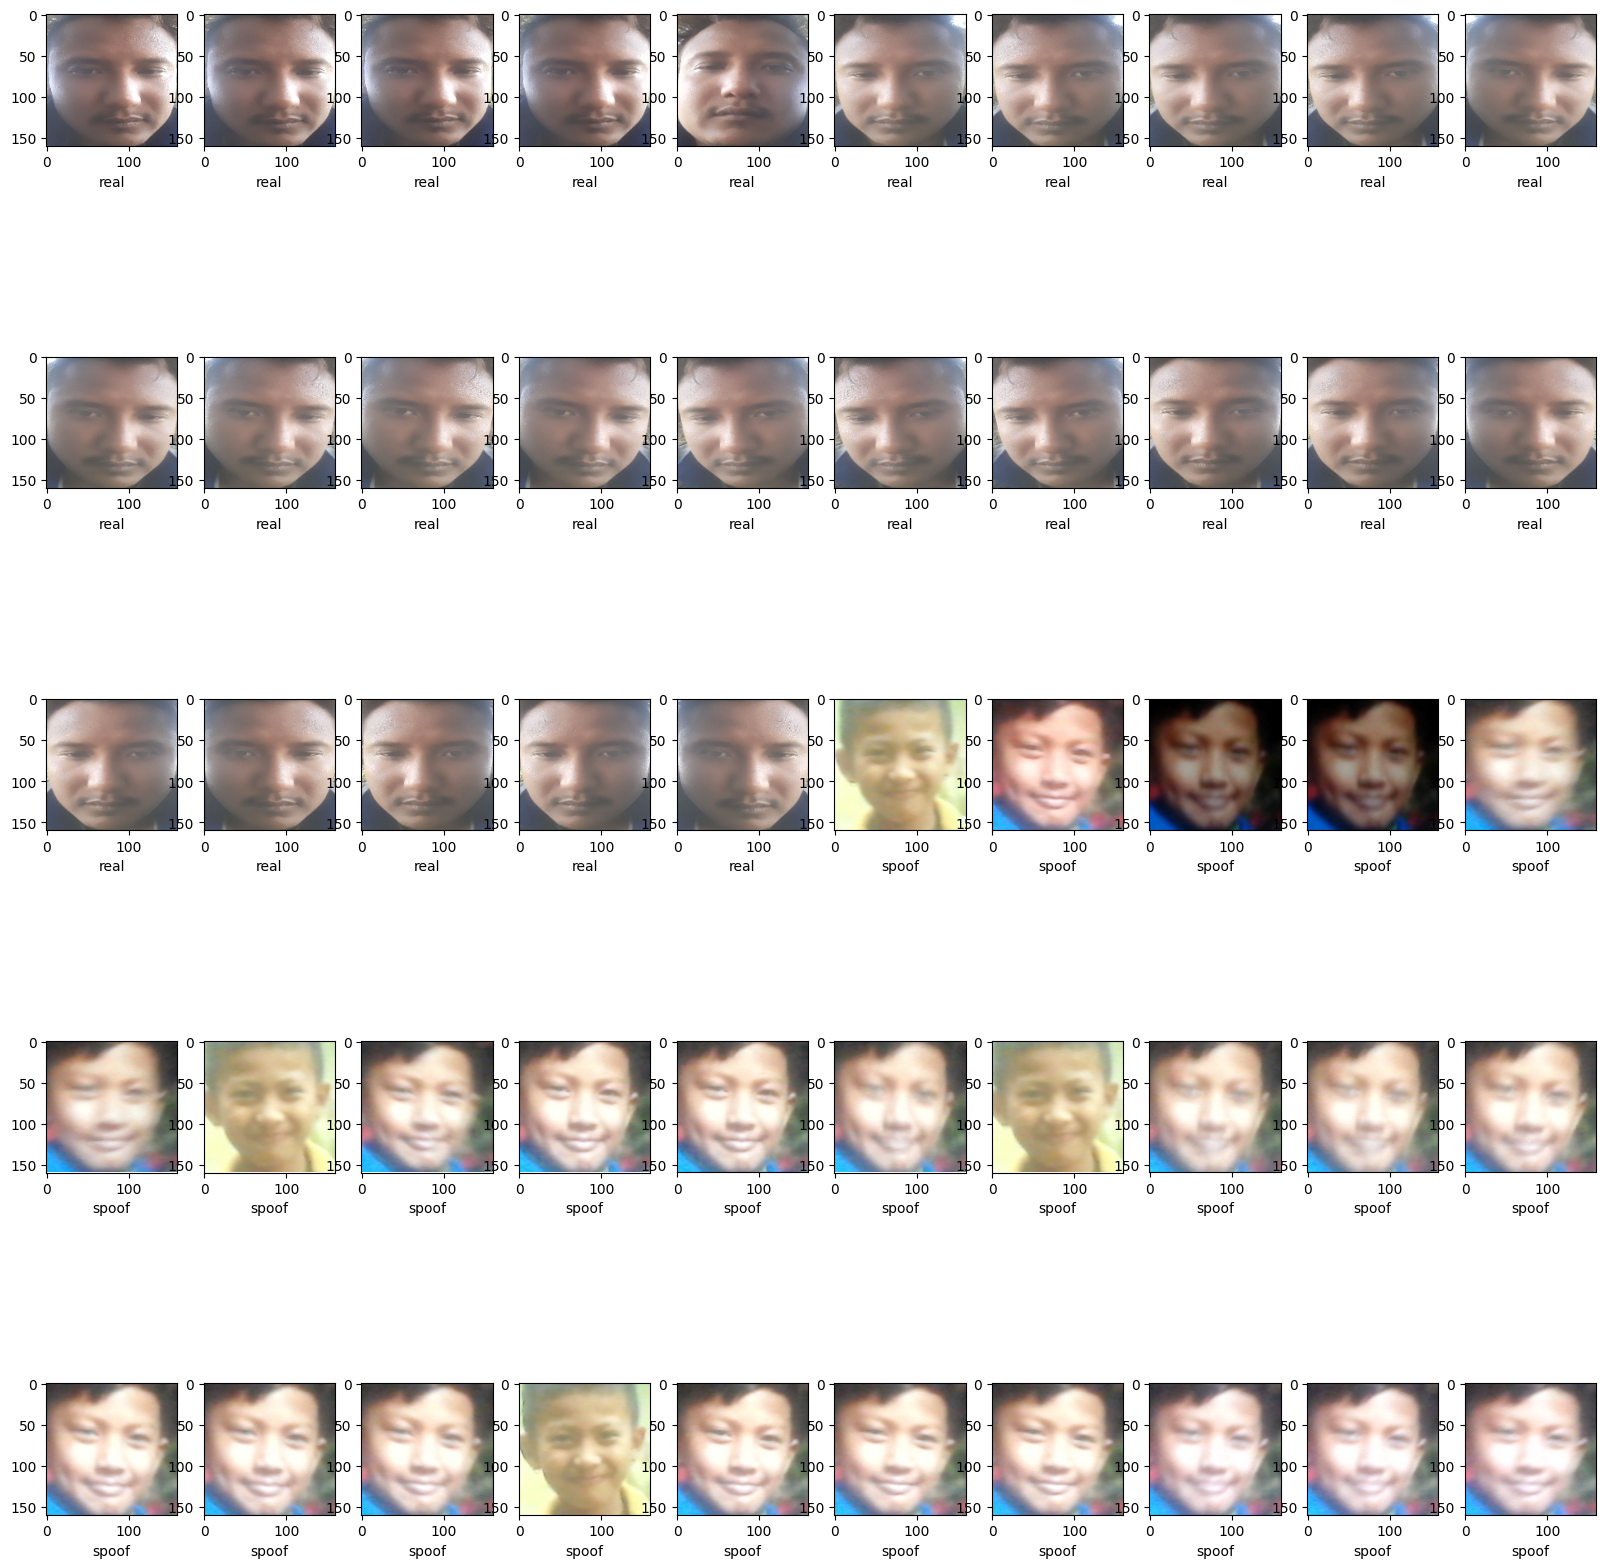

In [34]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

Testing Dataset Visualization

In [35]:
testing_image_path = get_images(data_dir= test_dir,number_of_samples=25)
print(testing_image_path)
print(len(testing_image_path))

['final_antispoofing_dataset\\test\\real\\20201110_113245.jpg', 'final_antispoofing_dataset\\test\\real\\20201110_113259.jpg', 'final_antispoofing_dataset\\test\\real\\20201110_113320hr_flip.jpg', 'final_antispoofing_dataset\\test\\real\\20201110_113342.jpg', 'final_antispoofing_dataset\\test\\real\\20201110_113455hr_flip.jpg', 'final_antispoofing_dataset\\test\\real\\20201110_113509.jpg', 'final_antispoofing_dataset\\test\\real\\20201110_113513hr_flip.jpg', 'final_antispoofing_dataset\\test\\real\\20201110_113518.jpg', 'final_antispoofing_dataset\\test\\real\\20201110_113524.jpg', 'final_antispoofing_dataset\\test\\real\\20201110_113526hr_flip.jpg', 'final_antispoofing_dataset\\test\\real\\20201110_113533hr_flip.jpg', 'final_antispoofing_dataset\\test\\real\\20201110_113540.jpg', 'final_antispoofing_dataset\\test\\real\\20201110_144657.jpg', 'final_antispoofing_dataset\\test\\real\\20201110_144700.jpg', 'final_antispoofing_dataset\\test\\real\\20201110_144704.jpg', 'final_antispoofing

Total images available: 50


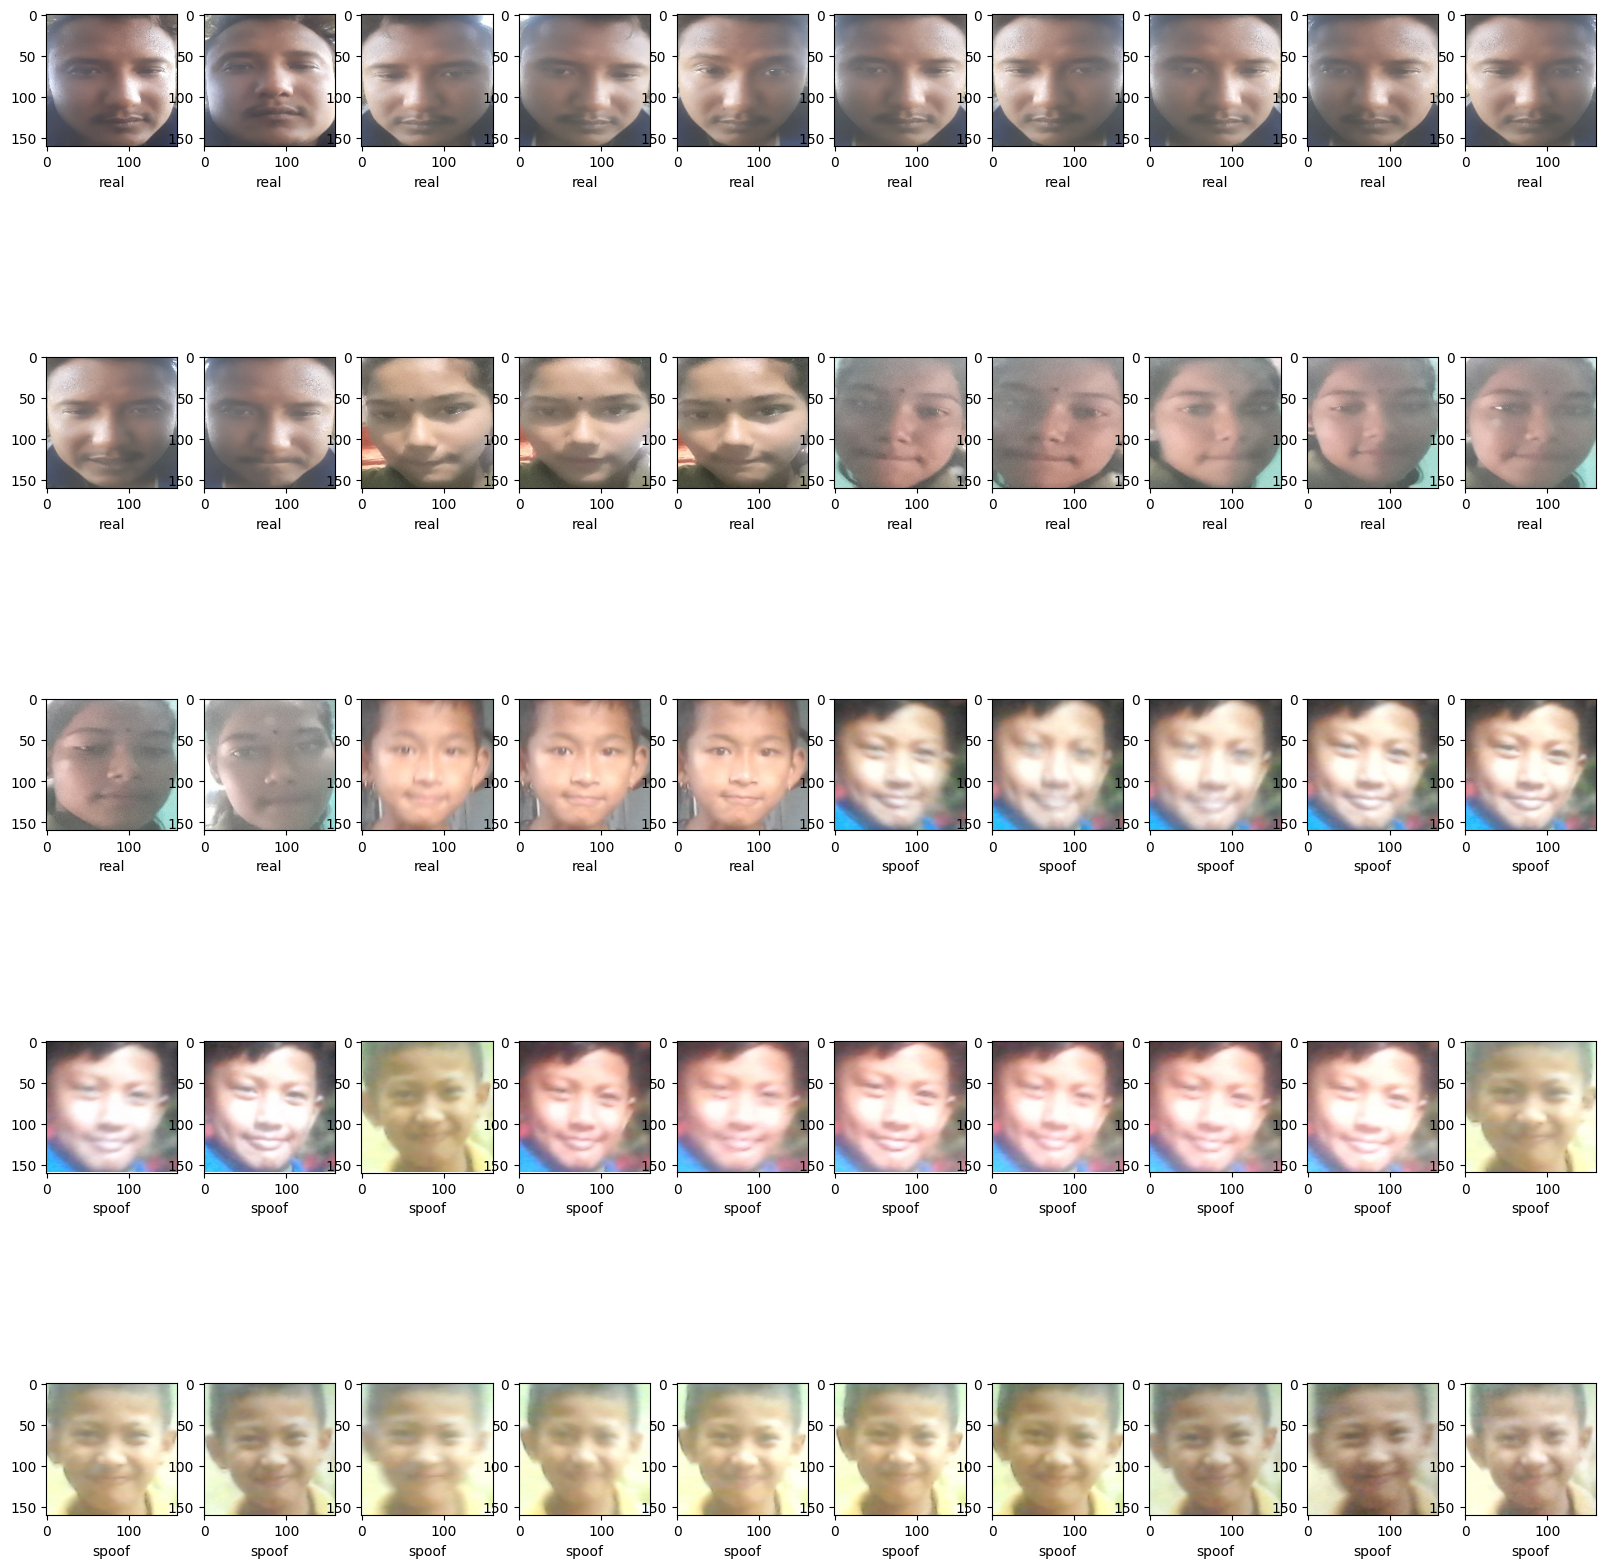

In [36]:
visualize_dataset(image_path=testing_image_path,rows=5,cols=10)

**<h3>Model Preparation</h3>**

<h3>Steps In Model Preparation</h3>
<h4>1. Choosing Framework and importing necessary libraries </h2>
<h4> 2. Load datasets and Perform image augmentations </h2>
<h4> 3. Model Selection  </h3>
<h4> 4. Compiling our model </h4>
<h4> 5. Setting our model checkpoints </h4>


<h4>Step 1 Keras Framework </h1>

In [38]:
from tensorflow.keras.layers import Dense,Dropout,Input,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import model_from_json
import json

<h4>Step 2 </h4>

In [39]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,fill_mode='nearest',shear_range=0.2,zoom_range=0.3,rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [40]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25,shuffle=True)

Found 4220 images belonging to 2 classes.


In [41]:
valid_generator = valid_datagen.flow_from_directory(test_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25)

Found 951 images belonging to 2 classes.


<h4>Step 3 Model Selection and Transfer Learning</h4>

In [42]:
mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(160,160,3)))

C:\Users\HP\AppData\Local\Temp\ipykernel_13548\450661621.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(160,160,3)))


In [43]:
mobilenet.trainable = False

In [44]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [45]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,514,001 (9.59 MB)

 Trainable params: 256,017 (1000.07 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

<h4>Step 4 Compiling the models </h4>

In [46]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

<h4>Step 5 Setting our model checkpoints </h4>

In [54]:
import os
os.mkdir(r'C:\Users\HP\Desktop\Company\Face-spoofing\model_weight')

In [58]:
model_checkpoint = ModelCheckpoint(r'model_weight/project_antispoofing_model_{epoch:02d}-{val_accuracy:.6f}.weights.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

In [60]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator, 
    validation_steps = valid_generator.samples // 25,
    epochs = 100,
    callbacks=[model_checkpoint])

Epoch 1/100


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 941ms/step - accuracy: 0.5470 - loss: 0.8867
Epoch 1: val_loss improved from inf to 0.69250, saving model to model_weight/project_antispoofing_model_01-0.586316.weights.h5
168/168 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.5471 - loss: 0.8864 - val_accuracy: 0.5863 - val_loss: 0.6925
Epoch 2/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 1:01 368ms/step - accuracy: 0.6000 - loss: 0.6759

c:\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss did not improve from 0.69250
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6000 - loss: 0.3400 - val_accuracy: 0.0000e+00 - val_loss: 0.8321
Epoch 3/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.6165 - loss: 0.7132
Epoch 3: val_loss improved from 0.69250 to 0.61907, saving model to model_weight/project_antispoofing_model_03-0.626316.weights.h5
168/168 ━━━━━━━━━━━━━━━━━━━━ 96s 566ms/step - accuracy: 0.6164 - loss: 0.7132 - val_accuracy: 0.6263 - val_loss: 0.6191
Epoch 4/100
  1/168 ━━━━━━━━━━━━━━━━━━━━ 1:01 370ms/step - accuracy: 0.4800 - loss: 0.7631
Epoch 4: val_loss improved from 0.61907 to 0.55905, saving model to model_weight/project_antispoofing_model_04-0.000000.weights.h5
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4800 - loss: 0.3838 - val_accuracy: 0.0000e+00 - val_loss: 0.5591
Epoch 5/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.6388 - loss: 0.6764
Epoch 5: val_loss did not improve from 0.55905
168/168 ━━━━

In [61]:
# serialize model to JSON
model_json = model.to_json()
with open("pro_antispoofing_model_mobilenet.json", "w") as json_file:
    json_file.write(model_json)

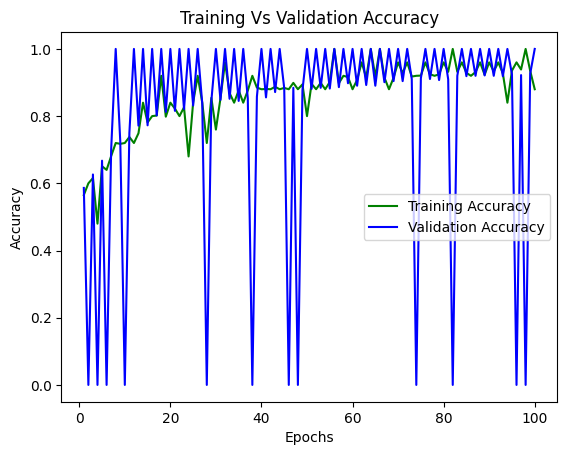

In [62]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
    

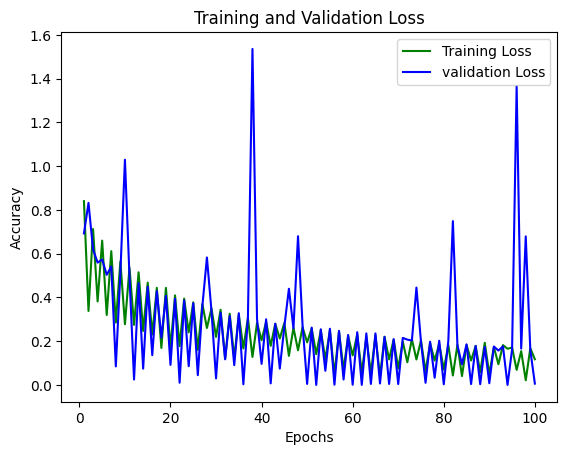

In [63]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [64]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [65]:
check_fakes(test_dir,categories[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━

{'spoof': 408, 'real': 66}

In [66]:
check_fakes(test_dir,categories[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

{'real': 473, 'spoof': 4}

In [67]:
(19+6)/(19+455+471+6)*100

2.6288117770767614

In [68]:
100-2.6288

97.3712